In [1]:
#link dataset
#https://archive.ics.uci.edu/ml/datasets/bank+marketing

In [2]:
import pandas as pd
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


the output variable, y, which has information on whether a client has subscribed to a term deposit, is encoded as 'yes' or 'no'. In order to simplify our conversion rate computations, we will encode this variable as 1 for 'yes' and 0 for 'no'.

In [3]:
df['conversion'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


# Aggregate conversion rate

We can calculate this metric by dividing the total number of clients subscribed to a term deposit by the total number of clients in the data.

In [4]:
# total number of conversions
df.conversion.sum()
# total number of clients in the data (= number of rows in the data)
df.shape[0]
print('total conversions: %i out of %i' % (df.conversion.sum(), df.shape[0]))
print('conversion rate: %0.2f%%' % (df.conversion.sum()/df.shape[0]*100))

total conversions: 4640 out of 41188
conversion rate: 11.27%


# Conversion rates by age

In [5]:
pembilang = df.groupby(by='age')['conversion'].sum() 
penyebut = df.groupby(by='age')['conversion'].count() * 100.0
conversions_by_age = pembilang / penyebut
conversions_by_age.head()

age
17    0.004000
18    0.004286
19    0.004762
20    0.003538
21    0.002843
Name: conversion, dtype: float64

In [6]:
type(conversions_by_age)

pandas.core.series.Series

In [7]:
import matplotlib.pyplot as plt

ax = conversions_by_age.plot(
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Age'
)

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()

<Figure size 1000x700 with 1 Axes>

In [8]:
df['age_group'] = df['age'].apply(lambda x: '[18, 30)' if x < 30 else '[30, 40)' if x < 40 else '[40, 50)' if x < 50 else '[50, 60)' if x < 60 else '[60, 70)' if x < 70 else '70+')

In [9]:
pembilang = df.groupby(by='age_group')['conversion'].sum() 
penyebut = df.groupby(by='age_group')['conversion'].count() * 100.0
conversions_by_age_group = pembilang/penyebut

print("Pembilang:")
pembilang

Pembilang:


age_group
70+          221
[18, 30)     922
[30, 40)    1715
[40, 50)     834
[50, 60)     697
[60, 70)     251
Name: conversion, dtype: int64

In [10]:
print("Melihat kolom age group:")
df.age_group

Melihat kolom age group:


0        [50, 60)
1        [50, 60)
2        [30, 40)
3        [40, 50)
4        [50, 60)
           ...   
41183         70+
41184    [40, 50)
41185    [50, 60)
41186    [40, 50)
41187         70+
Name: age_group, Length: 41188, dtype: object

In [11]:
print("Hasil:")
conversions_by_age_group

Hasil:


age_group
70+         0.004712
[18, 30)    0.001626
[30, 40)    0.001013
[40, 50)    0.000792
[50, 60)    0.001016
[60, 70)    0.003467
Name: conversion, dtype: float64

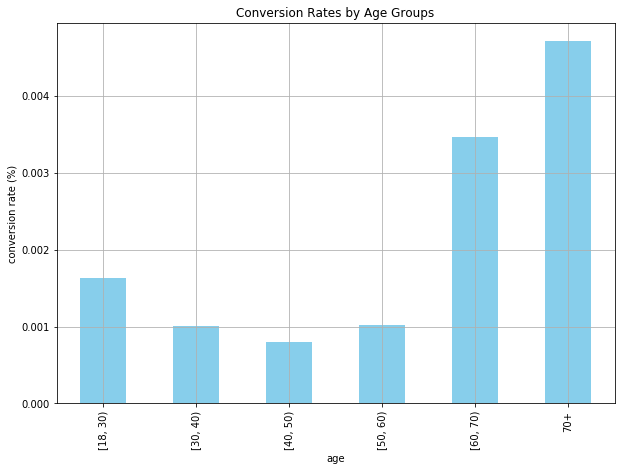

In [12]:
ax = conversions_by_age_group.loc[
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(
    kind='bar',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Age Groups'
)

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()

# Conversions versus non-conversions by marital status

In [13]:
conversions_by_marital_status_df = pd.pivot_table(df, values='y', index='marital', columns='conversion', aggfunc=len)
conversions_by_marital_status_df

conversion,0,1
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


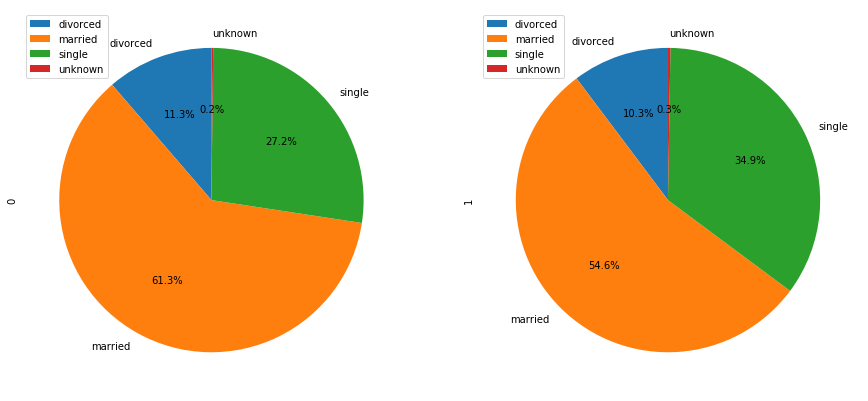

In [14]:
conversions_by_marital_status_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()

# Regression

In [15]:
#link dataset:
#https://raw.githubusercontent.com/pthiagu2/DataMining/master/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [17]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [18]:
df.shape

(9134, 24)

In [19]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

If you look at the data, you will notice a column named Response. It contains information on whether a customer responded to marketing calls. We will use this field as a measure of customer engagement

In [20]:
df['Engaged'] = df['Response'].apply(lambda x:0 if x=='No' else 1)

In [21]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Engaged
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0


## EDA

In [22]:
engagement_by_sales_channel_df = pd.pivot_table(
    df, values='Response', index='Sales Channel', columns='Engaged', aggfunc=len
).fillna(0.0)

engagement_by_sales_channel_df.columns = ['Not Engaged', 'Engaged']
engagement_by_sales_channel_df

,Not Engaged,Engaged
Sales Channel,,
Agent,2811,666
Branch,2273,294
Call Center,1573,192
Web,1169,156


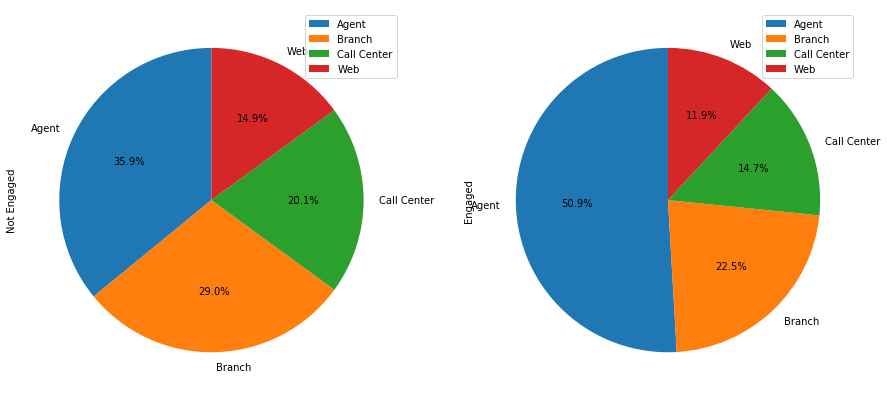

In [23]:
engagement_by_sales_channel_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()

In [24]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Engaged
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,0.143201
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.350297
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,0.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,0.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,0.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,0.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.000000


As you can see in this Jupyter Notebook snapshot, the describe function of a pandas DataFrame shows the distributions of all of the columns with numerical values

In [25]:
continuous_vars = [
    'Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 
    'Months Since Last Claim', 'Months Since Policy Inception', 
    'Number of Open Complaints', 'Number of Policies', 
    'Total Claim Amount'
]

In [26]:
#Logistic Regression
import statsmodels.api as sm
logit = sm.Logit(
    df['Engaged'], 
    df[continuous_vars]
)

model1 = logit.fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.421189
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9126
Method:                           MLE   Df Model:                            7
Date:                Tue, 23 Mar 2021   Pseudo R-squ.:                -0.02546
Time:                        13:31:03   Log-Likelihood:                -3847.1
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.741e-06   5.04e-06     -1.337      0.181   -1.66e-05    3.14e-06
Income                        -2.857e-06   1.03e-06     -2.766      0.006   -4.88e-06   -8.33e-07
Monthly Premium Auto             -0.0084      0.001     -6.889      0.000      -0.011      -0.006
Months Since Last Claim          -0.0202      0.003     -7.238      0.000      -0.026      -0.015
Months Since Policy Inception    -0.0060      0.001     -6.148      0.000      -0.008      -0.004
Number of Open Complaints        -0.0829      0.034     -2.424      0.015      -0.150      -0.016
Number of Policies               -0.0810      0.013     -6.356      0.000      -0.106      -0.056
Total Claim Amount                0.0001      0.000      0.711      0.477      -0.000       0.000
=================================================================================================
"""

- Looking at this model output, we can see that Income, Monthly Premium Auto, Months Since Last Claim, Months Since Policy Inception, and Number of Policies variables have significant relationships with the output variable, Engaged. 

- For example, Number of Policies variable is significant and is negatively correlated with Engaged. This suggests that the more policies that the customers have, the less likely they are to respond to marketing calls. 

- As another example, the Months Since Last Claim variable is significant and is negatively correlated with the output variable, Engaged. This means that the longer it has been since the last claim, the less likely that the customer is going to respond to marketing calls.

## Categorical Variable

In [27]:
df.Gender

0       F
1       F
2       F
3       M
4       M
       ..
9129    M
9130    F
9131    M
9132    M
9133    M
Name: Gender, Length: 9134, dtype: object

In [28]:
gender_values, gender_labels = df['Gender'].factorize()

In [29]:
gender_values

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [30]:
gender_labels

Index(['F', 'M'], dtype='object')

However, this function does not work when we want to embed natural orderings into the encoded values. For example, the Education variable in our dataset has five different categories: High School or Below, Bachelor, College, Master, and Doctor

In [31]:
df['Education']

0       Bachelor
1       Bachelor
2       Bachelor
3       Bachelor
4       Bachelor
          ...   
9129    Bachelor
9130     College
9131    Bachelor
9132     College
9133     College
Name: Education, Length: 9134, dtype: object

In [32]:
categories = pd.Categorical(
    df['Education'], 
    categories=['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor']
)

In [33]:
categories

['Bachelor', 'Bachelor', 'Bachelor', 'Bachelor', 'Bachelor', ..., 'Bachelor', 'College', 'Bachelor', 'College', 'College']
Length: 9134
Categories (5, object): ['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor']

In [34]:
categories.codes

array([1, 1, 1, ..., 1, 2, 2], dtype=int8)

As you can see in this code, we are using the pd.Categorical function to encode the values of df['Education']. We can define the orderings that we want with the argument, categories. In our example, we are giving values of 0, 1, 2, 3, and 4 for the High School or Below, Bachelor, College, Master, and Doctor, categories respectively. 

In [35]:
#masukin ke dataframe
df['GenderFactorized'] = gender_values
df['EducationFactorized'] = categories.codes

In [36]:
logit = sm.Logit(
    df['Engaged'], 
    df[[
        'GenderFactorized',
        'EducationFactorized'
    ]]
)

model2 = logit.fit()
model2.summary()

Optimization terminated successfully.
         Current function value: 0.493068
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9132
Method:                           MLE   Df Model:                            1
Date:                Tue, 23 Mar 2021   Pseudo R-squ.:                 -0.2005
Time:                        13:31:04   Log-Likelihood:                -4503.7
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
GenderFactorized       -1.1266      0.047    -24.116      0.000      -1.218      -1.035
EducationFactorized    -0.6256      0.021    -29.900      0.000      -0.667      -0.585
=======================================================================================
"""

- If we look at the coefficients of these two variables, we can see that both are negatively correlated with the output. This suggests that male customers, encoded with 1 in the GenderFactorized variable, are less likely to be engaged with marketing calls, as compared to female customers, encoded with 0 in the GenderFactorized variable
- Similarly, the higher the customers' education levels are, the less likely that they will be engaged with marketing calls.

## Combining continuous and categorical variables

In [37]:
logit = sm.Logit(
    df['Engaged'], 
    df[['Customer Lifetime Value',
        'Income',
        'Monthly Premium Auto',
        'Months Since Last Claim',
        'Months Since Policy Inception',
        'Number of Open Complaints',
        'Number of Policies',
        'Total Claim Amount',
        'GenderFactorized',
        'EducationFactorized'
    ]]
)

logit_fit = logit.fit()
model3 = logit.fit()
model3.summary()

Optimization terminated successfully.
         Current function value: 0.420810
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.420810
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9124
Method:                           MLE   Df Model:                            9
Date:                Tue, 23 Mar 2021   Pseudo R-squ.:                -0.02454
Time:                        13:31:05   Log-Likelihood:                -3843.7
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.909e-06   5.03e-06     -1.373      0.170   -1.68e-05    2.96e-06
Income                         -2.59e-06   1.04e-06     -2.494      0.013   -4.63e-06   -5.55e-07
Monthly Premium Auto             -0.0081      0.001     -6.526      0.000      -0.011      -0.006
Months Since Last Claim          -0.0194      0.003     -6.858      0.000      -0.025      -0.014
Months Since Policy Inception    -0.0057      0.001     -5.827      0.000      -0.008      -0.004
Number of Open Complaints        -0.0813      0.034     -2.376      0.017      -0.148      -0.014
Number of Policies               -0.0781      0.013     -6.114      0.000      -0.103      -0.053
Total Claim Amount                0.0001      0.000      0.943      0.346      -0.000       0.000
GenderFactorized                 -0.1500      0.058     -2.592      0.010      -0.263      -0.037
EducationFactorized              -0.0070      0.027     -0.264      0.792      -0.059       0.045
=================================================================================================
"""

# A/B Testing

we are going to discuss how to evaluate A/B testing results to decide which marketing strategy works the best. By the end of this section, we will have covered how to run statistical hypothesis testing and compute the statistical significance. 

In [38]:
#link dataset
#https://raw.githubusercontent.com/pthiagu2/DataMining/master/WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv

In [39]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/pthiagu2/DataMining/master/WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv')
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


Keterangan:
- MarketID: unique identifier for market
- MarketSize: size of market area by sales
- LocationID: unique identifier for store location
- AgeOfStore: age of store in years
- Promotion: one of three promotions that was tested
- week: one of four weeks when the promotions were run
- SalesInThousands: sales amount for specific LocationID, -  - Promotion, and week

In [40]:
#promosi base on promosi
means = df.groupby('Promotion').mean()['SalesInThousands']
stds = df.groupby('Promotion').std()['SalesInThousands']
ns = df.groupby('Promotion').count()['SalesInThousands']
means

Promotion
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64

As you can see from this code, you can easily compute the mean, the standard deviation, and the number of samples in each test group by using the mean, std, and count functions respectively. With these, we can compute the t-value using the previously discussed equation

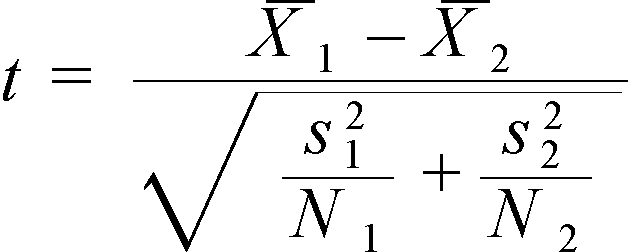

In [41]:
import numpy as np

pembilang = (means.iloc[0] - means.iloc[1])
penyebut = np.sqrt((stds.iloc[0]**2/ns.iloc[0]) + (stds.iloc[1]**2/ns.iloc[1]))
t_1_vs_2 = pembilang / penyebut
t_1_vs_2

6.427528670907475

In [42]:
#From this t-value, we can get the p-value 
from scipy import stats
df_1_vs_1 = ns.iloc[0] + ns.iloc[1] - 2
p_1_vs_2 = (1 - stats.t.cdf(t_1_vs_2, df=df_1_vs_1))*2
p_1_vs_2

4.143296816749853e-10

The average sales (in thousands) for promotion group 1 is about 58.1, and for promotion group 2 it's about 47.33. From our t-test, we have shown that the marketing performances for these two groups are significantly different and that promotion group 1 outperforms promotion group 2

In [43]:
#with package to compare promotion 1 vs promotion 3
t, p = stats.ttest_ind(
    df.loc[df['Promotion'] == 1, 'SalesInThousands'].values, 
    df.loc[df['Promotion'] == 3, 'SalesInThousands'].values, 
    equal_var=False
)
print("P-value = ", p)

P-value =  0.12059147742229478


In [44]:
#with package to compare promotion 2 vs promotion 3
t, p = stats.ttest_ind(
    df.loc[df['Promotion'] == 2, 'SalesInThousands'].values, 
    df.loc[df['Promotion'] == 3, 'SalesInThousands'].values, 
    equal_var=False
)
print("P-value = ", p)

P-value =  1.5692733176039892e-06


kesimpulan: promosi yang bisa dipilih adalah tipe 1 atau 3

# Customer Segmentation

In [1]:
#link of dataset
#http://archive.ics.uci.edu/ml/machine-learning-databases/00352/

In [2]:
import pandas as pd
df = pd.read_excel('Online Retail.xlsx', sheet_name='Online Retail')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Data cleansing

In [3]:
#removing negative value from quantity
df.loc[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [4]:
df = df.loc[df['Quantity'] > 0]

In [5]:
#removing missing value
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133361
Country             0
dtype: int64

In [6]:
df = df[pd.notnull(df['CustomerID'])]

In [7]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
#filtering data
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [9]:
#creating variable sales
df['Sales'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In order to analyze customer segments, we need to transform our data, so that each record represents the purchase history of individual customers. 

In [10]:
customer_df = df.groupby('CustomerID').agg({'Sales': sum, 'InvoiceNo': lambda x: x.nunique()})
customer_df.columns = ['TotalSales', 'OrderCount']
customer_df.head()

,TotalSales,OrderCount
CustomerID,,
12346.0,77183.60,1
12347.0,4085.18,6
12348.0,1797.24,4
12349.0,1757.55,1
12350.0,334.40,1


Now, as you can see from this data, the three columns, TotalSales, OrderCount, and AvgOrderValue, have different scales. Clustering algorithms are highly affected by the scales of the data, so we need to normalize this data to be on the same scale.

In [11]:
normalized_df = (customer_df - customer_df.mean()) / customer_df.std()
normalized_df

,TotalSales,OrderCount
CustomerID,,
12346.0,9.004376,-0.422046
12347.0,0.255222,0.251785
12348.0,-0.018621,-0.017747
12349.0,-0.023372,-0.422046
12350.0,-0.193709,-0.422046
...,...,...
18280.0,-0.212117,-0.422046
18281.0,-0.224060,-0.422046
18282.0,-0.221739,-0.422046


In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4).fit(normalized_df[['TotalSales', 'OrderCount']])
customer_df['Cluster'] = kmeans.labels_
customer_df

,TotalSales,OrderCount,Cluster
CustomerID,,,
12346.0,77183.60,1,2
12347.0,4085.18,6,0
12348.0,1797.24,4,0
12349.0,1757.55,1,0
12350.0,334.40,1,0
...,...,...,...
18280.0,180.60,1,0
18281.0,80.82,1,0
18282.0,100.21,1,0


In [24]:
pusat_klaster = kmeans.cluster_centers_
pusat_klaster

array([[-0.11955163, -0.19489723],
       [ 6.22366847,  8.08844569],
       [ 0.66862871,  1.52482568],
       [25.09520415, 11.74061243]])

In [14]:
#Denormalisasi

In [25]:
pusat_klaster[:,0]

array([-0.11955163,  6.22366847,  0.66862871, 25.09520415])

In [26]:
customer_df.std()

TotalSales    8354.913254
OrderCount       7.420253
Cluster          0.565537
dtype: float64

In [27]:
TS = pusat_klaster[:,0]*customer_df.std()[0]+customer_df.mean()[0]
OC = pusat_klaster[:,1]*customer_df.std()[1]+customer_df.mean()[1]
for i in range(len(TS)):
    print("Cluster ke", i ,"memiliki rata-rata pembelian sebesar", round(TS[i],2),"dan frekuensi pembelian sebanyak",round(OC[i],2))

Cluster ke 0 memiliki rata-rata pembelian sebesar 953.98 dan frekuensi pembelian sebanyak 2.69
Cluster ke 1 memiliki rata-rata pembelian sebesar 53951.03 dan frekuensi pembelian sebanyak 64.15
Cluster ke 2 memiliki rata-rata pembelian sebesar 7539.15 dan frekuensi pembelian sebanyak 15.45
Cluster ke 3 memiliki rata-rata pembelian sebesar 211621.07 dan frekuensi pembelian sebanyak 91.25


Kesimpulan: Customer yang masuk ke klaster ke 1 dan 3 merupakan target pasar yang mantap

In [28]:
customer_df[customer_df.Cluster == 1]

,TotalSales,OrderCount,Cluster
CustomerID,,,
12415.0,124914.53,21,1
12748.0,32649.46,201,1
12971.0,11028.01,84,1
13089.0,54144.21,93,1
13408.0,26708.42,59,1
13694.0,61908.46,47,1
13798.0,35316.61,54,1
14156.0,117379.63,55,1
14298.0,50889.70,43,1


In [29]:
customer_df[customer_df.Cluster == 3]

,TotalSales,OrderCount,Cluster
CustomerID,,,
14646.0,268478.00,71,3
14911.0,136846.14,192,3
17450.0,192988.39,45,3
18102.0,248171.76,57,3


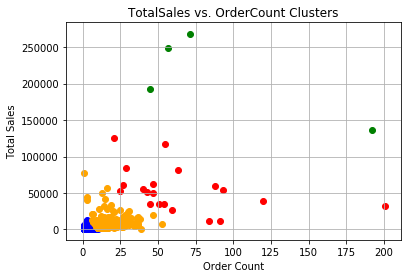

In [30]:
import matplotlib.pyplot as plt

plt.scatter(
    customer_df.loc[customer_df['Cluster'] == 0]['OrderCount'], 
    customer_df.loc[customer_df['Cluster'] == 0]['TotalSales'],
    c='blue'
)

plt.scatter(
    customer_df.loc[customer_df['Cluster'] == 1]['OrderCount'], 
    customer_df.loc[customer_df['Cluster'] == 1]['TotalSales'],
    c='red'
)

plt.scatter(
    customer_df.loc[customer_df['Cluster'] == 2]['OrderCount'], 
    customer_df.loc[customer_df['Cluster'] == 2]['TotalSales'],
    c='orange'
)

plt.scatter(
    customer_df.loc[customer_df['Cluster'] == 3]['OrderCount'], 
    customer_df.loc[customer_df['Cluster'] == 3]['TotalSales'],
    c='green'
)

plt.title('TotalSales vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Total Sales')

plt.grid()
plt.show()